<a href="https://colab.research.google.com/github/Snehalwadile/Time-Series-Model/blob/main/LSTM%20on%20Historical%20Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

LSTM model - No future forecasting here — just learning from history

Please upload MSFT_Historical_Data.csv


Saving MSFT_Historical_Data.csv to MSFT_Historical_Data.csv


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
99/99 ━━━━━━━━━━━━━━━━━━━━ 14s 79ms/step - loss: 0.0122
Epoch 2/20
99/99 ━━━━━━━━━━━━━━━━━━━━ 10s 77ms/step - loss: 1.0767e-04
Epoch 3/20
99/99 ━━━━━━━━━━━━━━━━━━━━ 10s 70ms/step - loss: 1.1835e-04
Epoch 4/20
99/99 ━━━━━━━━━━━━━━━━━━━━ 8s 79ms/step - loss: 1.2034e-04
Epoch 5/20
99/99 ━━━━━━━━━━━━━━━━━━━━ 10s 77ms/step - loss: 1.2284e-04
Epoch 6/20
99/99 ━━━━━━━━━━━━━━━━━━━━ 9s 67ms/step - loss: 1.1590e-04
Epoch 7/20
99/99 ━━━━━━━━━━━━━━━━━━━━ 10s 65ms/step - loss: 1.0182e-04
Epoch 8/20
99/99 ━━━━━━━━━━━━━━━━━━━━ 8s 78ms/step - loss: 9.7030e-05
Epoch 9/20
99/99 ━━━━━━━━━━━━━━━━━━━━ 11s 82ms/step - loss: 1.0105e-04
Epoch 10/20
99/99 ━━━━━━━━━━━━━━━━━━━━ 9s 69ms/step - loss: 1.0182e-04
Epoch 11/20
99/99 ━━━━━━━━━━━━━━━━━━━━ 8s 82ms/step - loss: 1.4487e-04
Epoch 12/20
99/99 ━━━━━━━━━━━━━━━━━━━━ 10s 78ms/step - loss: 1.1139e-04
Epoch 13/20
99/99 ━━━━━━━━━━━━━━━━━━━━ 10s 76ms/step - loss: 1.1764e-04
Epoch 14/20
99/99 ━━━━━━━━━━━━━━━━━━━━ 10s 70ms/step - loss: 8.3042e-05
Epoch 15/2

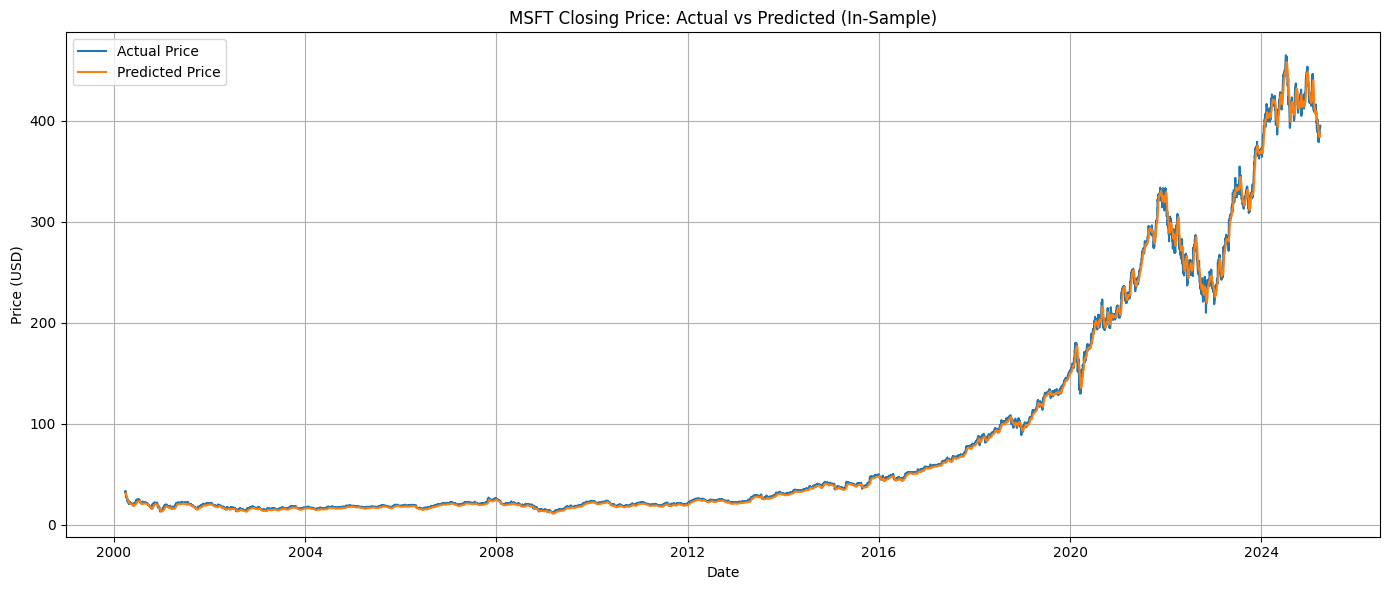

RMSE on historical data: 3.7435


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error
import math
from google.colab import files

# --- 1. Upload Local Historical Data ---
print("Please upload MSFT_Historical_Data.csv")
uploaded = files.upload()

# Read the uploaded file
file_name = list(uploaded.keys())[0]
df = pd.read_csv(file_name, parse_dates=['Date'])
df = df[['Date', 'Close']].dropna()
df.set_index('Date', inplace=True)

# --- 2. Preprocessing ---
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df)

def create_dataset(data, time_step=60):
    X, y = [], []
    for i in range(time_step, len(data)):
        X.append(data[i - time_step:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

time_step = 60
X, y = create_dataset(scaled_data, time_step)
X = X.reshape(X.shape[0], X.shape[1], 1)

# --- 3. Build LSTM Model ---
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(X.shape[1], 1)),
    LSTM(50, return_sequences=False),
    Dense(25),
    Dense(1)
])
model.compile(optimizer='adam', loss='mean_squared_error')

# --- 4. Train the Model ---
model.fit(X, y, epochs=20, batch_size=64, verbose=1)

# --- 5. Predict on the same input ---
predictions = model.predict(X)
predicted_prices = scaler.inverse_transform(predictions)
actual_prices = scaler.inverse_transform(y.reshape(-1, 1))

# --- 6. Plot Actual vs Predicted ---
plt.figure(figsize=(14, 6))
plt.plot(df.index[time_step:], actual_prices, label='Actual Price')
plt.plot(df.index[time_step:], predicted_prices, label='Predicted Price')
plt.title('MSFT Closing Price: Actual vs Predicted (In-Sample)')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# --- 7. Evaluate RMSE ---
rmse = math.sqrt(mean_squared_error(actual_prices, predicted_prices))
print(f'RMSE on historical data: {rmse:.4f}')